This file was modified on September 1, 2022 to include ClimateNA solar radiation data (MJ m-2 d-1), where available.
- calculate seasonal average (MJ m-2 d-1)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from kpmb_weather import get_date

nlakes = 100
delta_elev_m = 100

volume = 'Data'
volume = 'My Passport for Mac'

In [2]:
#dftopN

In [3]:
dftopN = pd.read_csv(f'/Volumes/{volume}/IceModels/topUSlakes.csv',low_memory=False)

dfice = pd.read_csv('../Data/IcePhenology/us_lakes_ts_minimal.csv',low_memory=False)


# added 'extra' weather for snow and precipitation, etc.
#   and removed dates with "quality" flags
filename = f'/Volumes/{volume}/IceModels/top{nlakes}_extra_weather_all_deltaElev_{delta_elev_m}m.csv'

dfworkingFilled = pd.read_csv(filename, low_memory=False)
dfworkingFilled['DATE'] = pd.to_datetime(dfworkingFilled.DATE)

In [4]:
# 1970-10-09 (USC00474383)
#dfworkingFilled.loc[(dfworkingFilled.lakecode=='JJM19'),['DATE','STATION','TMAX']].dropna(how='all',axis=1)

Check snow on warm days... Matches original weather record and no quality flags. So keep it.

,DATE,STATION,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES,TMINMAX,lakecode,lake,TOBS_ATTRIBUTES_QUALITY
18736,1903-04-20,USC00476718,5.1,",,6,",25.0,",,6,",0.000000,",,6,",21.1,",,6",7.2,",,6",10.6,",,6,",14.15,DMR1,mendota,NaN
19467,1905-04-20,USC00476718,7.6,",,6,",25.0,",,6,",0.000000,",,6,",13.3,",,6",6.1,",,6",6.1,",,6,",9.70,DMR1,mendota,NaN
36474,1951-11-12,USC00476718,1.3,",,0,0700",15.0,",,0,",NaN,NaN,13.3,",,0",5.6,",,0",8.9,",,0,1600",9.45,DMR1,mendota,NaN
36475,1951-11-13,USC00476718,25.4,",,0,0700",30.0,",,0,",NaN,NaN,12.2,",,0",7.8,",,0",10.0,",,0,1600",10.00,DMR1,mendota,NaN
105938,1973-01-18,USC00474482,3.0,",,0,1700",5.0,",,0,",0.000000,",,0,",10.6,",,0",6.1,",,0",7.2,",,0,1700",8.35,DMR2,monona,NaN
115140,1998-03-30,USC00474482,61.0,",,0,0700",152.0,",,0,",0.000000,"P,,0,",20.0,",,0",6.1,",,0",16.1,",,0,0700",13.05,DMR2,monona,NaN
163282,1973-01-18,USC00474482,3.0,",,0,1700",5.0,",,0,",0.000000,",,0,",10.6,",,0",6.1,",,0",7.2,",,0,1700",8.35,JD01,kegonsa,NaN
172484,1998-03-30,USC00474482,61.0,",,0,0700",152.0,",,0,",0.000000,"P,,0,",20.0,",,0",6.1,",,0",16.1,",,0,0700",13.05,JD01,kegonsa,NaN
232581,2003-10-12,USC00132724,NaN,NaN,3.0,",,0,",0.000000,"P,,0,",16.7,",,0",6.1,",,0",6.1,",,0,0700",11.40,JGL02,east_okoboji,NaN
233358,2005-11-27,USC00137859,16.5,",,0,2400",51.0,",,0,",51.000000,",,0,",11.7,",,0",6.1,",,0",NaN,NaN,8.90,JGL02,east_okoboji,NaN


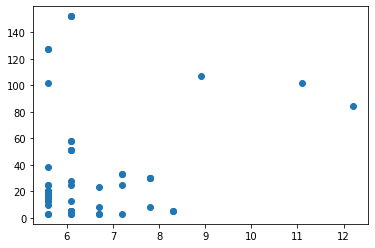

In [5]:
indmin = (dfworkingFilled['SNOW'] > 0) & (dfworkingFilled['TMIN']>5)
display(dfworkingFilled[indmin].dropna(how='all',axis=1))
plt.plot(dfworkingFilled.loc[indmin,'TMIN'],dfworkingFilled.loc[indmin,'SNOW'],ls='none',marker='o')

In [6]:
list_of_leap_years = [i for i in range(1800,2021,4) if (
                                                    ((i % 400)==0) | 
                                                        ((
                                                            (i % 100)!=0) & ((i % 4)==0)))]
#list_of_leap_years

### Daily antecedent temperature time series
Reorganize temperature time series so it is all relative to ice on and ice off dates.

In [9]:
#dfworkingFilled

In [10]:
dfworkingFilled['doy'] = dfworkingFilled.DATE.dt.day_of_year
dfworkingFilled['start_year'] = dfworkingFilled.DATE.dt.year-1

# convert DOY to negative if July 1st or later (182 or 183 in leap year)

ly = (dfworkingFilled.start_year+1).isin(list_of_leap_years)

print(ly.sum())
ind = ((dfworkingFilled.doy>181) & ~ly) | ((dfworkingFilled.doy>182) & ly)

dfworkingFilled.loc[ind,'start_year'] = dfworkingFilled.loc[ind,'start_year']+1
dfworkingFilled.loc[ind,'doy'] = dfworkingFilled.loc[ind,'doy']-(365+ly)

dfdaily = {}
for var in ['TMINMAX','SNOW','PRCP','SNWD']:
    dfdaily[var] = dfworkingFilled.pivot_table(index=['lakecode','start_year'],
                                               dropna=False,columns='doy',values=var)
    print(var, dfdaily[var].shape)
index_order = dfdaily['TMINMAX'].index

718458
TMINMAX (19600, 366)
SNOW (19600, 366)
PRCP (19600, 366)
SNWD (19600, 366)


Calculate ice on day of year and ice off day of year, and reorganize so ice index matches weather index.

In [11]:
dfice['ice_on_doy'] = (pd.to_datetime(dfice.ice_on_1) - pd.to_datetime(dfice.start_year.astype(str)+'-12-31')).dt.days

dfice['ice_off_doy'] = (pd.to_datetime(dfice.ice_off_6.fillna(dfice.ice_off_5.fillna(dfice.ice_off_4).fillna(dfice.ice_off_3).fillna(dfice.ice_off_2).fillna(dfice.ice_off_1))) - pd.to_datetime(dfice.start_year.astype(str)+'-12-31')).dt.days

dfice['ice_duration'] = dfice['ice_off_doy'] - dfice['ice_on_doy']
ind_nofreeze = dfice.froze=='N'
dfice.loc[ind_nofreeze,'ice_duration'] = 0

ice_index = dfice.set_index(['lakecode','start_year']).index
weather_index = pd.MultiIndex.from_tuples([i for i in index_order if i in ice_index],names=['lakecode','start_year'])

df_lakeice = dfice.set_index(['lakecode','start_year']).loc[weather_index,:]

df_lakeweather = {}
for var in ['TMINMAX','SNOW','PRCP','SNWD']:
    df_lakeweather[var] = dfdaily[var].loc[weather_index,:]

Look at rows that have missing TMINMAX. May not be able to use these rows for FDD and HDD calculations

In [12]:
ind = df_lakeweather['TMINMAX'].loc[:,-183:181].isnull().any(axis=1)
print(ind.sum(),'out of', df_lakeweather['TMINMAX'].shape[0])

683 out of 7821


In [13]:
df_lakeweather['TMINMAX'].dropna(how='all',axis=0)

doy                  -183.0  -182.0  -181.0  -180.0  -179.0  -178.0  -177.0  \
lakecode start_year                                                           
DMR1     1868           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
         1869         22.50   21.95   23.35   17.80   18.65   20.85   21.35   
         1870         18.60   23.35   25.85   23.90   23.90   21.95   16.90   
         1871         20.55   22.20   21.10   21.15   23.90   21.65   22.80   
         1872         26.65   26.95   23.90   19.75   20.25   21.95   23.30   
...                     ...     ...     ...     ...     ...     ...     ...   
xKB1987  2011         29.45   24.40   23.90   26.10   26.10   24.20   25.60   
         2012         28.60   31.10   28.05   32.75   30.85   28.90   23.90   
         2013         23.30   22.20   22.50   25.55   26.95   28.85   27.80   
         2014         18.35   17.75   20.00   20.60   23.60   26.40   24.45   
         2015         18.90   19.15   21.15   23.85   25.00   19.40   17.20   

doy                  -176.0  -175.0  -174.0  ...   173.0   174.0   175.0  \
lakecode start_year                          ...                           
DMR1     1868           NaN     NaN     NaN  ...   17.50   17.20   16.95   
         1869         21.40   23.10   24.45  ...   23.05   27.50   29.45   
         1870         18.60   25.00   23.05  ...   19.70   16.65   16.90   
         1871         27.75   22.80   19.45  ...   22.50   21.35   22.80   
         1872         24.75   24.45   26.70  ...   25.80   26.95   26.10   
...                     ...     ...     ...  ...     ...     ...     ...   
xKB1987  2011         27.25   27.75   26.95  ...   20.55   21.95   22.25   
         2012         26.95   25.60   24.70  ...   23.35   25.00   23.35   
         2013         25.55   26.15   22.75  ...   21.95   23.60   23.35   
         2014         20.85   20.25   22.75  ...   22.80   20.85   21.15   
         2015         18.35   21.40   23.85  ...   21.95   22.75   19.70   

doy                   176.0   177.0   178.0   179.0   180.0   181.0   182.0  
lakecode start_year                                                          
DMR1     1868         16.95   17.75   18.05   20.55   22.80   20.00     NaN  
         1869         30.55   30.25   26.95   29.75   30.55   28.90     NaN  
         1870         20.55   22.50   21.10   16.95   16.10   17.20     NaN  
         1871         24.15   26.70   28.05   25.55   26.10   25.30    26.4  
         1872         26.95   26.95   23.90   25.00   21.95   20.30     NaN  
...                     ...     ...     ...     ...     ...     ...     ...  
xKB1987  2011         23.90   20.30   21.70   27.25   26.40   25.00    27.2  
         2012         23.90   27.25   26.40   22.75   21.10   20.85     NaN  
         2013         17.75   20.80   24.15   24.45   23.60   22.75     NaN  
         2014         22.50   22.20   21.95   22.80   23.30   20.85     NaN  
         2015         21.70   28.90   25.25   21.10   19.70   21.40    21.1  

[7266 rows x 366 columns]

## Antecedent conditions
Reorganize so all weather variables are relative to ice-on or ice-off, removing weather data from rows with no ice-on or ice-off information.

In [14]:
from IPython.display import clear_output
df_lakeweather_offset_iceon = {}
df_lakeweather_offset_iceoff = {}

for var in ['TMINMAX','SNOW','PRCP','SNWD']:
    
    dfon_ = df_lakeweather[var].copy()
    dfoff_ = df_lakeweather[var].copy()
    for ii in range(-183,183):
        
        
        ind1 = df_lakeice.ice_on_doy == -ii
        ind2 = df_lakeice.ice_off_doy == -ii
        if (ind1.sum()==0) & (ind2.sum()==0):
            continue        
        clear_output(wait=True)
        print(var, ii)
        df_shift = df_lakeweather[var].loc[:,-183:182].shift(ii,axis=1).copy()
        #display(df_shift)
        dfon_.loc[ind1,-183:182] = df_shift[ind1]
        dfoff_.loc[ind2,-183:182] = df_shift[ind2]
        
        
        """
        if ((df_lakeice.ice_on_doy==-shift).sum()+
            (df_lakeice.ice_off_doy==-shift).sum())==0:
            continue
        df0_ = df_lakeweather[var].shift(shift,axis=1)
        
        ind = df_lakeice.ice_on_doy == -shift
        dfon_.loc[ind,:] = df0_.loc[ind,:].values
        
        ind = df_lakeice.ice_off_doy == -shift
        dfoff_.loc[ind,:] = df0_.loc[ind,:].values
        """
    ind1 = df_lakeice.ice_on_doy.isnull()
    ind2 = df_lakeice.ice_off_doy.isnull()
    dfon_.loc[ind1,-183:182] = np.nan
    dfoff_.loc[ind2,-183:182] = np.nan
    
    df_lakeweather_offset_iceon[var] = dfon_
    df_lakeweather_offset_iceoff[var] = dfoff_
        

SNOW 63


KeyboardInterrupt: 

Adjust ice off to exclude time period before ice on. And remove all data if no information on duration.

In [ ]:
nrows = len(df_lakeice) #7821

assert(nrows == 7821)

# copy antecedent days columns to new dataframe indicating antecedent conditions in each row
#  i.e., [-183,-182,...,180,181,182] in each row
#dfoo = pd.DataFrame(np.tile(np.array(df_lakeweather_offset_iceoff['TMINMAX'].columns.to_list()),(nrows,1)),index=df_lakeice.index,
#                    columns=df_lakeweather_offset_iceoff['TMINMAX'].columns) 

#< df_lakeice['ice_duration']
# Find index where duration is equal to the antecedent condition
# i.e., a duration of 50 would match up with -50 days before ice off
#dfoo = (dfoo.add(df_lakeice['ice_duration'],axis=0)==0).idxmax(axis=1)

# cycle through all rows, removing data from before ice on, 
#     as we are only focussing on conditions between ice on and ice off
for i,row in df_lakeweather_offset_iceoff['TMINMAX'].iterrows():
    
    # get ice duration
    ice_duration = df_lakeice.loc[i,'ice_duration']
    
    if np.isnan(ice_duration):
        print(i,'removing all data; no ice duration')
        for c in ['TMINMAX','SNOW','PRCP','SNWD']:
            df_lakeweather_offset_iceoff[c].loc[i,-183:0] = np.nan
            
    elif ice_duration < 183:
        clear_output(wait=True)
        print(i,-ice_duration)
        for c in ['TMINMAX','SNOW','PRCP','SNWD']:
            df_lakeweather_offset_iceoff[c].loc[i,-183:int(-ice_duration)] = np.nan
    else:
        clear_output(wait=True)
        print(i,-ice_duration, 'keeping it all')
        #for c in ['TMINMAX','SNOW','PRCP','SNWD']:
        #    df_lakeweather_offset_iceoff[c].loc[i,-183:-ice_duration] = np.nan
        #print(i,duration, 'removing all data since duration is not known')
        
        
#        break

In [ ]:
df_lakeweather_offset_iceoff['TMINMAX'].loc[('JJM15',1995),:].plot()

### Calculate FDD and HDD for ice-on and ice-off, respectively
- antecedent time series generally gets shifted to the right (relative to DOY) for ice-on as the date of ice-on happens before Jan 1.
- also a number of rows may be blank throughout as they do not have any information on ice-on date (or ice-off date)

In [ ]:
df_lakeweather['SNOW'].loc[('DMR1',1854),:].dropna()
nrows

In [ ]:
# FREEZING DEGREE DAYS
df_fdd = df_lakeweather_offset_iceon['TMINMAX'].copy()

# zero out above zero temperatures
indzero = df_lakeweather_offset_iceon['TMINMAX']>0

df_fdd[indzero] = 0

#also need to fill in zeros at beginning of antecedent time series
# don't fill in data in rows that are all NA before DAY ZERO
indmissing = df_fdd.loc[:,-183:0].isnull().all(axis=1)

df_fdd[~indmissing] = df_fdd.mask(df_fdd.ffill(axis=1).isnull(),0)[~indmissing]

# Skip row if there are any missing dates
df_fdd = np.abs(df_fdd.loc[:,-183:0].cumsum(axis=1,skipna=False)[0])#.dropna(how='all',axis=0)

# remove result if FDD is 0 -- error in ice on date record or error in temperature weather stations...
ind = df_fdd==0
display(df_fdd[ind])
df_fdd[ind] = np.nan



# HEATING DEGREE DAYS
df_hdd = df_lakeweather_offset_iceoff['TMINMAX'].copy()

# zero out below zero temperatures
indzero = df_lakeweather_offset_iceoff['TMINMAX']<0

df_hdd[indzero] = 0

#also need to fill in zeros at beginning of antecedent time series
# don't fill in data in rows that are all NA before DAY ZERO
indmissing = df_hdd.loc[:,-183:0].isnull().all(axis=1)

df_hdd[~indmissing] = df_hdd.mask(df_hdd.ffill(axis=1).isnull(),0)[~indmissing]

# Skip row if there are any missing dates
df_hdd = df_hdd.loc[:,-183:0].cumsum(axis=1,skipna=False)[0]#.dropna(how='all',axis=0)
display(df_hdd[df_hdd==0])



In [ ]:
display(df_lakeweather_offset_iceoff['TMINMAX'].loc[df_hdd[df_hdd>500].index,:])

df_lakeice.loc[df_hdd[df_hdd>500].index,'ice_duration']

### Seasonal weather patterns

In [ ]:
dfworkingFilled.loc[(dfworkingFilled.lakecode=='DMR1')& (dfworkingFilled.start_year==1852),'SNOW'].dropna()

In [ ]:
dfworkingFilled['Year'] = dfworkingFilled.DATE.dt.year
dfworkingFilled['Month'] = dfworkingFilled.DATE.dt.month
dfworkingFilled['Year_lag1'] = dfworkingFilled.Year-1

ind = dfworkingFilled.Month<6
dfworkingFilled.loc[ind,'WinterYear'] = dfworkingFilled.loc[ind,'Year_lag1']
dfworkingFilled.loc[~ind,'WinterYear'] = dfworkingFilled.loc[~ind,'Year']
dfworkingFilled['Season'] = ((dfworkingFilled.Month+6) // 3) % 4

complete_seasons = dfworkingFilled.groupby(['lakecode','WinterYear','Season']).Month.apply(lambda x: len(x.unique())==3).reset_index().rename({'Month':'CompleteSeason'},axis=1)

print('Status: first merger')
dfworkingFilled_extra = dfworkingFilled.merge(complete_seasons,left_on=['lakecode','WinterYear','Season'],
                      right_on=['lakecode','WinterYear','Season'],validate='many_to_one',how='left')

print('Status: entering for loop')
for var in ['TMINMAX','SNOW','SNWD','PRCP']:
    dfworkingFilled_extra.loc[~dfworkingFilled_extra.CompleteSeason,var] = np.nan

    season_dict = {0:f'{var}_lagJJA',1:f'{var}_lagSON',2:f'{var}_DJF',3:f'{var}_MAM'}
    print(var)
    if var in ['TMINMAX','SNWD']:
        dfseasonal_ = dfworkingFilled_extra.groupby(['lakecode','WinterYear','Season'])[var].mean().reset_index().pivot_table(index = ['lakecode','WinterYear'],columns='Season',values=var).rename(season_dict,axis=1)
    else:
        dfseasonal_ = dfworkingFilled_extra.groupby(['lakecode','WinterYear','Season'])[var].sum(min_count=1).reset_index().pivot_table(index = ['lakecode','WinterYear'],columns='Season',values=var).rename(season_dict,axis=1)
    if var=='TMINMAX':
        dfseasonal_all = dfseasonal_.copy()
    else:
        dfseasonal_all = dfseasonal_all.merge(dfseasonal_,left_index=True,right_index=True,how='outer',validate='one_to_one')


In [ ]:
#dfresult2.columns

What about zero duration no freeze seasons?

In [ ]:
df_final = dfseasonal_all.merge(df_fdd.rename_axis(('lakecode','WinterYear')).rename('FDD_on'),
                                left_index=True,right_index=True,how='outer').merge(
                                df_hdd.rename_axis(('lakecode','WinterYear')).rename('HDD_off'),
                                left_index=True,right_index=True,how='outer')
df_final = df_final.join(dftopN.set_index('lakecode'),how='outer')
df_final = df_final.merge(dfice[['lakecode','start_year','ice_on_doy','ice_off_doy','ice_duration']], left_index=True,
               right_on= ['lakecode','start_year'],how='left')
first_columns= ['lakecode','lake','start_year','ice_on_doy','ice_off_doy','ice_duration','lat','lon']
next_columns = [c for c in df_final.columns if c not in first_columns]
df_final = df_final[first_columns+next_columns].drop(['start_date','end_date'],axis=1).sort_values(['lakecode','start_year']).reset_index(drop=True)
df_final.columns
df_final.HDD_off.hist()

Version 10 excludes HydroLAKES match for Peltier Lake, MN

Version 11 is completely rebuilt weather time series based on TMINMAX values and including snow and precipitation
- changed column headings
    - level_0 -> lakecode
    - GDD_off -> HDD_off
    - duration -> ice_duration
- new column headings
    - SNOW seasonal (total snow fall)
    - SNWD seasonal (average snow depth)
    - PRCP seasonal (total precipitation)
- removed column headings
    - GDD_on
    - FDD_off
    - FDD_offseason
    - GDD_off
    - FDD_year
    - start_date
    - end_date

In [344]:
df_final.to_csv(f'/Volumes/{volume}/IceModels/model_input_v11.csv')

#df_lakeweather['SNOW'].loc[('LR1',1895),:].replace(0,np.nan).dropna()

Add ClimateNA solar radiation data based on lat,lon and Elevation columns
- lagJJA, lagSON, DJF and MAM

In [7]:
df_final = pd.read_csv(f'/Volumes/{volume}/IceModels/model_input_v11.csv')
df_final.columns

Index(['Unnamed: 0', 'lakecode', 'lake', 'start_year', 'ice_on_doy',
       'ice_off_doy', 'ice_duration', 'lat', 'lon', 'TMINMAX_lagJJA',
       'TMINMAX_lagSON', 'TMINMAX_DJF', 'TMINMAX_MAM', 'SNOW_lagJJA',
       'SNOW_lagSON', 'SNOW_DJF', 'SNOW_MAM', 'SNWD_lagJJA', 'SNWD_lagSON',
       'SNWD_DJF', 'SNWD_MAM', 'PRCP_lagJJA', 'PRCP_lagSON', 'PRCP_DJF',
       'PRCP_MAM', 'FDD_on', 'HDD_off', 'Distance', 'Hylak_id', 'Match',
       'Lake_name', 'Country', 'Continent', 'Poly_src', 'Lake_type',
       'Grand_id', 'Lake_area', 'Shore_len', 'Shore_dev', 'Vol_total',
       'Vol_res', 'Vol_src', 'Depth_avg', 'Dis_avg', 'Res_time', 'Elevation',
       'Slope_100', 'Wshd_area', 'Pour_long', 'Pour_lat'],
      dtype='object')

In [8]:
dfclimatena = pd.read_csv('/Users/blagrave/Desktop/Folder to share/US_lakes_climateNA_1901-2020MP.csv')

,Year,ID1,ID2,Latitude,Longitude,Elevation,Tmax01,Tmax02,Tmax03,Tmax04,...,Rad03,Rad04,Rad05,Rad06,Rad07,Rad08,Rad09,Rad10,Rad11,Rad12
0,1901,mendota,DMR1,43.1280,-89.420,258,-1.9,-4.6,3.6,15.1,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,1901,monona,DMR2,43.0670,-89.366,256,-1.8,-4.6,3.8,15.1,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,1901,anderson,ETJ1,46.1710,-89.344,-9999,-6.2,-7.9,0.8,12.7,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,1901,auburn,GAH1,44.1444,-70.250,79,-2.4,-3.4,3.2,11.5,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,1901,kezar,GAH10,44.1930,-70.901,114,-2.3,-3.9,3.8,12.8,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


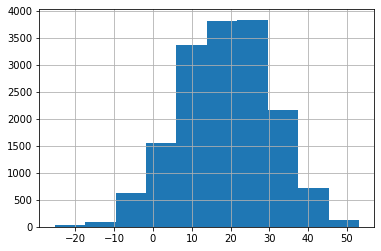

In [62]:
dfclimatena[dfclimatena.Rad05!=-9999].Rad05.hist()
dfclimatena.head()

In [75]:
df_final.columns

Index(['Unnamed: 0', 'lakecode', 'lake', 'start_year', 'ice_on_doy',
       'ice_off_doy', 'ice_duration', 'lat', 'lon', 'TMINMAX_lagJJA',
       'TMINMAX_lagSON', 'TMINMAX_DJF', 'TMINMAX_MAM', 'SNOW_lagJJA',
       'SNOW_lagSON', 'SNOW_DJF', 'SNOW_MAM', 'SNWD_lagJJA', 'SNWD_lagSON',
       'SNWD_DJF', 'SNWD_MAM', 'PRCP_lagJJA', 'PRCP_lagSON', 'PRCP_DJF',
       'PRCP_MAM', 'FDD_on', 'HDD_off', 'Distance', 'Hylak_id', 'Match',
       'Lake_name', 'Country', 'Continent', 'Poly_src', 'Lake_type',
       'Grand_id', 'Lake_area', 'Shore_len', 'Shore_dev', 'Vol_total',
       'Vol_res', 'Vol_src', 'Depth_avg', 'Dis_avg', 'Res_time', 'Elevation',
       'Slope_100', 'Wshd_area', 'Pour_long', 'Pour_lat'],
      dtype='object')

<AxesSubplot:xlabel='Rad04', ylabel='Tmax04'>

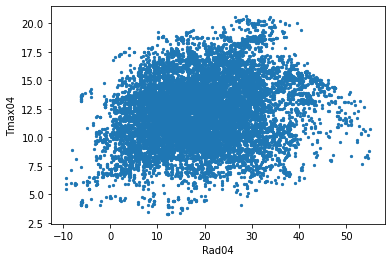

In [99]:
dfclimatena[ (dfclimatena.Rad05!=-9999)].plot.scatter('Rad04','Tmax04',
                                                                                               marker='.'
                                                                                       )

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

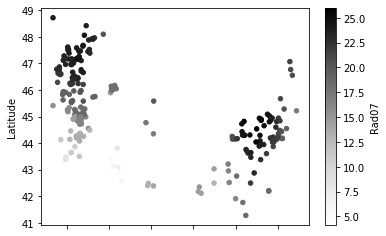

In [113]:
dfclimatena[(dfclimatena.Rad05!=-9999) & (dfclimatena.Year.isin([1990]))].plot.scatter(x='Longitude',y='Latitude',
                                                                                       c='Rad07')

In [112]:
dfclimatena[(dfclimatena.Rad01 < 0) & (dfclimatena.Rad01!=-9999)]

,Year,ID1,ID2,Latitude,Longitude,Elevation,Tmax01,Tmax02,Tmax03,Tmax04,...,Rad03,Rad04,Rad05,Rad06,Rad07,Rad08,Rad09,Rad10,Rad11,Rad12
12816,1949,mendota,DMR1,43.128,-89.420,258,-1.2,-0.9,5.5,15.2,...,16.8,38.3,12.1,16.8,7.2,11.3,16.2,12.4,5.7,3.4
12817,1949,monona,DMR2,43.067,-89.366,256,-1.0,-0.8,5.6,15.2,...,16.9,38.4,12.1,16.9,7.2,11.3,16.4,12.4,5.9,3.5
12848,1949,kegonsa,JD01,42.966,-89.251,-9999,-0.7,-0.7,5.7,15.2,...,17.2,38.7,13.2,12.9,4.1,8.4,16.7,12.7,6.3,2.6
12855,1949,koshkonong,JJM13,42.873,-88.964,235,-0.2,-0.4,6.1,15.5,...,17.4,38.4,15.2,12.8,4.0,8.2,17.7,13.3,5.9,2.6
12860,1949,wingra,JJM18,43.054,-89.419,257,-1.0,-0.8,5.7,15.2,...,16.8,38.4,12.1,16.8,7.1,11.3,16.2,12.3,5.7,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,1998,douglas,MICH07,45.582,-84.704,214,-2.0,2.6,4.2,13.6,...,0.2,34.3,22.1,12.5,24.1,9.9,10.8,14.6,2.3,6.5
26033,1998,grand_traverse_bay,RAA3,44.770,-85.620,-9999,-0.5,3.6,4.8,13.9,...,-3.4,33.7,21.5,16.0,30.7,8.3,18.7,16.4,4.6,11.7
27801,2005,spirit,JGL01,43.477,-95.102,425,-5.5,2.6,5.3,16.8,...,20.5,18.7,12.9,4.6,24.8,10.3,16.0,12.2,-1.0,4.6
27802,2005,east_okoboji,JGL02,43.390,-95.100,-9999,-5.5,2.6,5.4,16.8,...,19.9,18.9,13.0,4.6,25.0,10.4,16.0,12.2,-0.8,4.7


<AxesSubplot:xlabel='Year'>

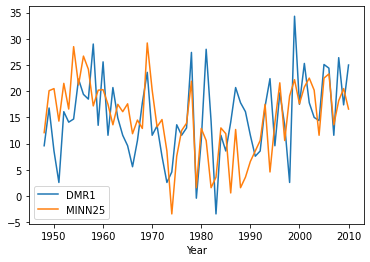

In [114]:
ax  = dfclimatena.loc[(dfclimatena.Rad05!=-9999) & dfclimatena.ID2.isin(['DMR1']),:].plot('Year','Rad03',label='DMR1')
dfclimatena.loc[(dfclimatena.Rad05!=-9999) & dfclimatena.ID2.isin(['MINN25']),:].plot('Year','Rad03',ax=ax,label='MINN25')


In [41]:
df_final = pd.read_csv(f'/Volumes/{volume}/IceModels/model_input_v11.csv',index_col= 0)

dfclimatena = pd.read_csv('/Users/blagrave/Desktop/Folder to share/US_lakes_climateNA_1901-2020MP.csv').replace(-9999,np.nan)
dfclimatena = dfclimatena[['Year','ID2']+[f'Tave{i:02d}' for i in range(1,13)]+
                          [f'PPT{i:02d}' for i in range(1,13)]+
                         [f'Rad{i:02d}' for i in range(1,13)]]
dfclimatena = dfclimatena.set_index(['ID2','Year']).stack().reset_index()

dfclimatena['Month'] = dfclimatena.level_2.str[-2:].astype(int)

dfclimatena['Season'] = dfclimatena['Year'].apply(lambda x: f"{x}-{x+1}")
ind = dfclimatena['Month'] < 6
dfclimatena.loc[ind,'Season'] = dfclimatena.loc[ind,'Year'].apply(lambda x: f"{x-1}-{x}")
dfclimate = dfclimatena.pivot_table(index = ['ID2','Season'],columns='level_2',values=0)[[f"PPT{i:02d}" for i in
                                                                              [r for r in range(6,13)]+[r for r in range(1,6)]]+
                                                                             [f"Tave{i:02d}" for i in
                                                                              [r for r in range(6,13)]+[r for r in range(1,6)]]+
                                                                             [f"Rad{i:02d}" for i in
                                                                              [r for r in range(6,13)]+[r for r in range(1,6)]]
                                                                                        ]

dfclimate

level_2           PPT06  PPT07  PPT08  PPT09  PPT10  PPT11  PPT12  PPT01  \
ID2    Season                                                              
DMR1   1900-1901    NaN    NaN    NaN    NaN    NaN    NaN    NaN   22.0   
       1901-1902   80.0   99.0   27.0  116.0   70.0   22.0   22.0   10.0   
       1902-1903  125.0  208.0   37.0  112.0   39.0   59.0   65.0   12.0   
       1903-1904   60.0  161.0  173.0   90.0   66.0   32.0   26.0   14.0   
       1904-1905   69.0   80.0   69.0  149.0   62.0    5.0   63.0   25.0   
...                 ...    ...    ...    ...    ...    ...    ...    ...   
xMM093 2016-2017   93.0  104.0  117.0   56.0   90.0   79.0   94.0   67.0   
       2017-2018  185.0  123.0   96.0   89.0  159.0   60.0   84.0   92.0   
       2018-2019   91.0   93.0   93.0   96.0  111.0  180.0   98.0  132.0   
       2019-2020  180.0   93.0  101.0   96.0  163.0  122.0   93.0   89.0   
       2020-2021   70.0  111.0  107.0   79.0  114.0   64.0  100.0    NaN   

level_2           PPT02  PPT03  ...  Rad08  Rad09  Rad10  Rad11  Rad12  Rad01  \
ID2    Season                   ...                                             
DMR1   1900-1901   33.0   92.0  ...    NaN    NaN    NaN    NaN    NaN    NaN   
       1901-1902   39.0   57.0  ...    NaN    NaN    NaN    NaN    NaN    NaN   
       1902-1903   46.0   74.0  ...    NaN    NaN    NaN    NaN    NaN    NaN   
       1903-1904   34.0  101.0  ...    NaN    NaN    NaN    NaN    NaN    NaN   
       1904-1905   43.0   63.0  ...    NaN    NaN    NaN    NaN    NaN    NaN   
...                 ...    ...  ...    ...    ...    ...    ...    ...    ...   
xMM093 2016-2017   96.0   78.0  ...    NaN    NaN    NaN    NaN    NaN    NaN   
       2017-2018   78.0   82.0  ...    NaN    NaN    NaN    NaN    NaN    NaN   
       2018-2019   82.0   48.0  ...    NaN    NaN    NaN    NaN    NaN    NaN   
       2019-2020   94.0   70.0  ...    NaN    NaN    NaN    NaN    NaN    NaN   
       2020-2021    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   

level_2           Rad02  Rad03  Rad04  Rad05  
ID2    Season                                 
DMR1   1900-1901    NaN    NaN    NaN    NaN  
       1901-1902    NaN    NaN    NaN    NaN  
       1902-1903    NaN    NaN    NaN    NaN  
       1903-1904    NaN    NaN    NaN    NaN  
       1904-1905    NaN    NaN    NaN    NaN  
...                 ...    ...    ...    ...  
xMM093 2016-2017    NaN    NaN    NaN    NaN  
       2017-2018    NaN    NaN    NaN    NaN  
       2018-2019    NaN    NaN    NaN    NaN  
       2019-2020    NaN    NaN    NaN    NaN  
       2020-2021    NaN    NaN    NaN    NaN  

[32307 rows x 36 columns]

In [58]:
for new, m in {'lagJJA':[6,7,8],'lagSON':[9,10,11],'DJF':[12,1,2],'MAM':[3,4,5]}.items():
    for v in ['PPT','Tave','Rad']:
        columns = [f'{v}{mm:02d}' for mm in m]
        newv  = f'{v}_{new}'
        if v in ['Tave','Rad']:
            dfclimate[newv] = dfclimate[columns].mean(axis=1,skipna=False)
        else:
            dfclimate[newv] = dfclimate[columns].sum(axis=1,skipna=False)
            
dfclimate['Year'] = dfclimate.index.get_level_values(1).str[:4].astype(int).values

In [64]:
df_final2 = df_final.merge(dfclimate.iloc[:,-12:].reset_index(),right_on=['ID2','Year'],left_on=['lakecode','start_year'],how='left').drop(['ID2','Year'],axis=1)

In [66]:
df_final2.to_csv(f'/Volumes/{volume}/IceModels/model_input_v11b.csv')

---
OLD ANALYSES BELOW THIS LINE
___

In [233]:
df_final.duration.max()

198.0

In [5]:
df_all = {}

for lakecode in dftopN.lakecode:
    
    if lakecode in df_all:
        continue
        
    # extract particular lake
    dfweat = dfworkingFilled.reset_index(drop=True)
    dfweat = dfweat[dfweat.lakecode==lakecode]
    # ensure the time series is complete
    dfweat = dfweat.set_index('DATE').reindex(pd.date_range(dfweat.DATE.min(),dfweat.DATE.max())).reset_index()
    print(lakecode)
    
    df_working = dfice[dfice.lakecode==lakecode]
    
    ########### ICE ON ###########
    
    # get first ice on of season
    dfoo = pd.DataFrame()
    for i, row in df_working.iterrows():
        indsub = dfweat['index'].dt.year.between(row.start_year,row.start_year+1)
        #  leading up to ice on, start on 1 July of the year
        if pd.isnull(row.ice_on_1):
            before_ = 365
        else:
            before_ = (pd.to_datetime(row.ice_on_1) - pd.to_datetime(f'{row.start_year}-07-01')).days
        after_ = 10
        dfoo = dfoo.append(get_date(row.ice_on_1, dfweat[indsub], variable = 'TMINMAX',datecolumn='index',label=row.start_year,
                                                 before=before_, after=after_))
    df_working = df_working.merge(dfoo.rename({c:f'ice_on_{c}' for c in dfoo.columns},axis=1), right_index=True, left_on='start_year')
    
    ########### ICE OFF ###########    
    
    # get last ice off of season
    df_working['ice_off'] = df_working.ice_off_6.fillna(dfice.ice_off_5).fillna(dfice.ice_off_4).fillna(dfice.ice_off_3).fillna(dfice.ice_off_2).fillna(dfice.ice_off_1)
    
    # get duration in order to determine "before" days for each lake/year
    df_working['duration'] = (pd.to_datetime(df_working.ice_off) - pd.to_datetime(df_working.ice_on_1)).dt.days
    
    
    dfoo = pd.DataFrame()
    after_max = 100
    before_max = 200
    for i, row in df_working.iterrows():
        indsub = dfweat['index'].dt.year.between(row.start_year,row.start_year+1)
        if pd.isnull(row.ice_off):
            after_ = 100
        else:
            after_ = (pd.to_datetime(f'{row.start_year+1}-06-30') - pd.to_datetime(row.ice_off)).days
        after_max = np.max([after_,after_max])
        try:
            before_ = int(row.duration)
        except:
            before_ = 200
        before_max = np.max([before_,before_max])
        #print(before_, after_)
        dfoo = dfoo.append(get_date(row.ice_off, dfweat[indsub], variable = 'TMINMAX',datecolumn='index',label=row.start_year,
                                                 before=before_, after=after_))
    df_working = df_working.merge(dfoo.rename({c:f'ice_off_{c}' for c in dfoo.columns},axis=1), right_index=True, left_on='start_year')
    
    # sort columns:

    new_columns = [c for c in df_working.columns if 'ice_off_TMINMAX' not in c] + [f'ice_off_TMINMAX_{c:+04d}day' for c in range(-before_max,after_max+1) if f'ice_off_TMINMAX_{c:+04d}day' in df_working.columns]
    df_working = df_working[new_columns]
    df_all[lakecode] = df_working
    

DMR1
DMR2
HB01


KeyboardInterrupt: 

Display antecedent conditions for a given lake

In [ ]:
lakes = ['mendota','monona','shell']
fig,axes = plt.subplots(2,len(lakes), figsize=(len(lakes)*2,3),sharey=True)
i =0
for (lakecode,df_working) in df_all.items():
    
    lakename = dftopN[dftopN.lakecode==lakecode].lake.unique()[0]
    if lakename not in lakes:
        continue
    df_working.set_index('start_year').loc[:,'ice_on_TMINMAX_-020day':'ice_on_TMINMAX_+010day'].T.set_index(pd.Index(range(-20,11))).plot(color='C0',alpha=0.1,legend=False, ax = axes[0][i])
    df_working.set_index('start_year').loc[:,'ice_on_TMINMAX_-020day':'ice_on_TMINMAX_+010day'].T.set_index(pd.Index(range(-20,11))).mean(axis=1).plot(color='C0',lw=4,legend=False,ax=axes[0][i])
    axes[0][i].set_title(lakename)
    axes[0][i].set_xlabel('Days around ice-on')

    axes[0][i].set_ylabel(u'Mean T (\N{DEGREE SIGN}C)')
    df_working.set_index('start_year').loc[:,'ice_off_TMINMAX_-020day':'ice_off_TMINMAX_+010day'].T.set_index(pd.Index(range(-20,11))).plot(color='C1',alpha=0.1,legend=False, ax = axes[1][i])
    df_working.set_index('start_year').loc[:,'ice_off_TMINMAX_-020day':'ice_off_TMINMAX_+010day'].T.set_index(pd.Index(range(-20,11))).mean(axis=1).plot(color='C1',lw=4,legend=False,ax=axes[1][i])
    axes[1][i].set_xlabel('Days around ice-off')
    axes[1][i].set_ylabel(u'Mean T (\N{DEGREE SIGN}C)')
    i = i+1

### Freezing degree days
Determine FDD (T<0) and GDD (T>0) prior to ice_on and between ice_on and ice_off.

In [7]:
df_fdd_on = pd.DataFrame()
df_fdd_off = pd.DataFrame()
# start on ice on day and calculate total number of freezing degree days until summer (June 30)
df_fdd_offseason = pd.DataFrame()

df_gdd_on = pd.DataFrame()
df_gdd_off = pd.DataFrame()

# Can't calculate FDD and GDD if the weather record is not complete so make sure this check is done here
#    added skipna=False to cumsum on July 30 2021 -- may not work properly so added 
# dfooo.dropna(how='any',axis=0) [wrong]
#  5 NOV 2021
#   changed to : ind = dfooo.isnull().any(axis=1); dfooo[ind]=np.nan ; so year does not get removed entirely

for (lakecode, df_working) in (df_all.items()):
    #start_day_on = int(-365)
    start_day_on = -1*int(''.join([s for s in [c for c in df_working.columns if 'ice_on_TMINMAX' in c][0] if s.isdigit()]))

    # antecedent negative temperature conditions (post-summer) 1 July to ice-on
    dfooo = df_working.set_index('start_year').loc[:,'ice_on_TMINMAX_{:+04d}day'.format(start_day_on):'ice_on_TMINMAX_+000day']
    
    # fill in zeroes at beginning
    for i,row in dfooo.iterrows():
        dfooo.loc[i,:row.first_valid_index()] = 0
    # if there are any other values missing remove the row (this removes the year...)
    ind = dfooo.isnull().any(axis=1)
    dfooo[ind]=np.nan

    #dfooo = dfooo.dropna(how='any',axis=0)

    dfooo = dfooo.T.set_index(pd.Index(range(start_day_on,1))).applymap(lambda x: np.abs(x) if x < 0 else 0).cumsum(axis=0).loc[0,:].T#.mean(axis=1).plot(label='{} 1960-2020'.format(lakename),lw=lw,color='C{}'.format(i),ax=axes[1])
    df_fdd_on.loc[:, lakecode] = dfooo.replace(0,np.nan)
    
    # antecedent summer conditions (rough estimate since last thaw of lake)
    dfooo = df_working.set_index('start_year').loc[:,'ice_on_TMINMAX_{:+04d}day'.format(start_day_on):'ice_on_TMINMAX_+000day']#
    #
    # fill in zeroes at beginning
    for i,row in dfooo.iterrows():
        dfooo.loc[i,:row.first_valid_index()] = 0
    # if there are any other values missing remove the row
    #dfooo = dfooo.dropna(how='any',axis=0)
    ind = dfooo.isnull().any(axis=1)
    dfooo[ind]=np.nan

    dfooo = dfooo.T.set_index(pd.Index(range(start_day_on,1))).applymap(lambda x: np.abs(x) if x > 0 else 0).cumsum(axis=0).loc[0,:].T#.mean(axis=1).plot(label='{} 1960-2020'.format(lakename),lw=lw,color='C{}'.format(i),ax=axes[1])
    df_gdd_on.loc[:, lakecode] = dfooo.replace(0,np.nan)
    
    # this is different for each row (only relevant cells have numbers so can add up all columns)
    start_day_off = -int(df_working.duration.max())

    # GDD ICE OFF
    dfooo = df_working.set_index('start_year').loc[:,'ice_off_TMINMAX_{:+04d}day'.format(start_day_off):'ice_off_TMINMAX_+000day']

    #   NOTE THAT WE CAN NOT HAVE PROPER GDD_OFF AND FDD_OFF if we don't have duration so remove them
    ind_noduration = df_working.set_index('start_year').duration.isnull()
    dfooo.loc[ind_noduration,:] = np.nan
    # Use skipna=False to ensure values after na are excluded
    # - fill up to first valid index in each column with zeroes
    
    dfooo = dfooo.T.set_index(pd.Index(range(start_day_off,1))).applymap(lambda x: 0 if x <0 else np.abs(x))
    
    for c in dfooo.columns:  
        last_missing_index = dfooo.loc[:,c].first_valid_index() 
        if last_missing_index is None:
            continue
        last_missing_index = last_missing_index - 1
        if last_missing_index in dfooo.index:
            dfooo.loc[:last_missing_index,c] = 0
    dfooo = dfooo.cumsum(axis=0,skipna=False).loc[0,:].T
    df_gdd_off.loc[:, lakecode] = dfooo.replace(0,np.nan)
    
    # FDD ICE OFF
    #print(start_day_off, '0 days')
    dfooo = df_working.set_index('start_year').loc[:,'ice_off_TMINMAX_{:+04d}day'.format(start_day_off):'ice_off_TMINMAX_+000day']    
    
    ind_noduration = df_working.set_index('start_year').duration.isnull()
    dfooo.loc[ind_noduration,:] = np.nan
    
    # Use skipna=False to ensure values after na are excluded
    # - fill up to first valid index in each column with zeroes
    dfooo = dfooo.T.set_index(pd.Index(range(start_day_off,1))).applymap(lambda x: 0 if (x>0) else np.abs(x))
    #display(dfooo[2009].tail())
    for c in dfooo.columns:
        last_missing_index = dfooo.loc[:,c].first_valid_index() 
        if last_missing_index is None:
            continue
        last_missing_index = last_missing_index - 1
        if last_missing_index in dfooo.index:
            dfooo.loc[:last_missing_index,c] = 0
    #display(dfooo[2017].head(5))
    dfooo = dfooo.cumsum(axis=0,skipna=False).loc[0,:].T
    df_fdd_off.loc[:, lakecode] = dfooo.replace(0,np.nan)
    
    # FDD ICE OFF SEASON (easier to calculate if ice off is not known -- i.e., FDD ice off season can be used in fitting of GDD ice off)
    end_day_off = int(''.join([s for s in [c for c in df_working.columns if 'ice_off_TMINMAX' in c][-1] if s.isdigit()]))
    
    #print(start_day_off, end_day_off)
    dfooo = df_working.set_index('start_year').loc[:,'ice_off_TMINMAX_{:+04d}day'.format(start_day_off):f'ice_off_TMINMAX_{end_day_off:+04d}day']    
    
    ind_noduration = df_working.set_index('start_year').duration.isnull()
    dfooo.loc[ind_noduration,:] = np.nan
    
    # Use skipna=False to ensure values after na are excluded
    # - fill up to first valid index in each column with zeroes
    dfooo = dfooo.T.set_index(pd.Index(range(start_day_off,end_day_off+1))).applymap(lambda x: 0 if (x>0) else np.abs(x))
    #display(dfooo[2017].dropna().tail(97).head(15))
    for c in dfooo.columns:
        last_missing_index = dfooo.loc[:,c].first_valid_index() 
        if last_missing_index is None:
            continue
        last_missing_index = last_missing_index - 1
        if last_missing_index in dfooo.index:
            dfooo.loc[:last_missing_index,c] = 0
    #display(dfooo[2017].head())
    #display(dfooo[2017].tail(125))
    dfooo = dfooo.cumsum(axis=0,skipna=False).ffill().loc[end_day_off,:].T
    df_fdd_offseason.loc[:, lakecode] = dfooo.replace(0,np.nan)

Create a FDD for the July 1 to June 30 season

In [8]:
df_fdd = pd.DataFrame(index = df_fdd_offseason.index)
for name,group in dfworkingFilled.groupby('lakecode'):
    foo = group.set_index('DATE')
    foo.loc[foo.TMINMAX<0, 'FDD'] = np.abs(foo[foo.TMINMAX<0].TMINMAX)
    foo.loc[foo.TMINMAX>=0, 'FDD'] = 0
    #display(foo)
    foo = foo.resample('A-JUN').FDD.agg(pd.Series.sum, skipna=False)
    foo.index = foo.index.year-1
    foo.index.name = 'start_year'
    foo.name = name
    #display(foo.to_frame())
    df_fdd = df_fdd.merge(foo,left_index=True,right_index=True,how='left')

Merge all FDD and GDD values

In [9]:
dfresult = df_fdd_on.unstack().reset_index().merge(dftopN,left_on='level_0',how='outer',right_on='lakecode').merge(df_gdd_on.unstack().reset_index(),left_on=['level_0','start_year'],right_on=['level_0','start_year'],how='outer').rename({'0_x':'FDD_on','0_y':'GDD_on'},axis=1)
dfresult = dfresult.merge(df_fdd_off.unstack().reset_index(),left_on=['level_0','start_year'],right_on=['level_0','start_year'],how='outer')
dfresult = dfresult.merge(df_fdd_offseason.unstack().reset_index(),left_on=['level_0','start_year'],right_on=['level_0','start_year'],how='outer').rename({'0_x':'FDD_off','0_y':'FDD_offseason'},axis=1)
dfresult = dfresult.merge(df_gdd_off.unstack().reset_index(),left_on=['level_0','start_year'],right_on=['level_0','start_year'],how='outer')
dfresult = dfresult.merge(df_fdd.unstack().reset_index(),left_on=['level_0','start_year'],right_on=['level_0','start_year'], how='outer').rename({'0_x':'GDD_off','0_y':'FDD_year'},axis=1)

for i,row in dfresult.iterrows():
    lakecode = row.level_0
    ind = df_all[lakecode].start_year == row.start_year
    duration = df_all[lakecode].loc[ind,'duration'].values
    if len(duration)!=1:
        continue
    else:
        dfresult.loc[i,'duration'] = duration[0]

### Calculate seasonal averages
Exclude missing years from TMINMAX mean

In [10]:
season_dict = {0:'TMINMAX_lagJJA',1:'TMINMAX_lagSON',2:'TMINMAX_DJF',3:'TMINMAX_MAM'}

dfworkingFilled['Year'] = dfworkingFilled.DATE.dt.year
dfworkingFilled['Month'] = dfworkingFilled.DATE.dt.month
dfworkingFilled['Year_lag1'] = dfworkingFilled.Year-1

ind = dfworkingFilled.Month<6
dfworkingFilled.loc[ind,'WinterYear'] = dfworkingFilled.loc[ind,'Year_lag1']
dfworkingFilled.loc[~ind,'WinterYear'] = dfworkingFilled.loc[~ind,'Year']
dfworkingFilled['Season'] = ((dfworkingFilled.Month+6) // 3) % 4

complete_seasons = dfworkingFilled.groupby(['lakecode','WinterYear','Season']).Month.apply(lambda x: len(x.unique())==3).reset_index().rename({'Month':'CompleteSeason'},axis=1)

dfworkingFilled_extra = dfworkingFilled.merge(complete_seasons,left_on=['lakecode','WinterYear','Season'],
                      right_on=['lakecode','WinterYear','Season'],validate='many_to_one',how='left')

dfworkingFilled_extra.loc[~dfworkingFilled_extra.CompleteSeason,'TMINMAX'] = np.nan


dfseasonal_TMINMAX = dfworkingFilled_extra.groupby(['lakecode','WinterYear','Season']).TMINMAX.mean().reset_index().pivot_table(index = ['lakecode','WinterYear'],columns='Season',values='TMINMAX').rename(season_dict,axis=1)


In [11]:
dfresult2 = dfresult.merge(dfseasonal_TMINMAX,how='left',left_on=['level_0','start_year'],right_index=True)

Reintroduce actual ice on and ice off dates, since these had been dropped from the table.

In [12]:
for name,group in dfresult2.groupby('level_0'):
    result = group.reset_index().merge(df_all[name][['start_year','ice_on_1','ice_off']],
                        left_on='start_year',
                        validate='one_to_one',how='left',
                        right_on='start_year').set_index('index')
    # convert date to DOY
    result['ice_on_doy'] = (pd.to_datetime(result.ice_on_1) - pd.to_datetime(result.start_year.astype(str)+'-12-31')).dt.days
    result['ice_off_doy'] = (pd.to_datetime(result.ice_off) - pd.to_datetime(result.start_year.astype(str)+'-12-31')).dt.days
    
    dfresult2.loc[group.index, 'ice_on_doy'] = result['ice_on_doy']
    dfresult2.loc[group.index,'ice_off_doy'] = result['ice_off_doy']

Version 5 has corrected TMINMAX values (removed TMIN > TMAX rows, as well as TOBS > TMAX rows)

Version 6 is for top 100 lakes.

Version 7 is fixed so that it doesn't skip 1911.

Version 8 excludes np.abs(Tdiff) > 50 ... But includes cases where TMIN > TMAX ;; assuming they were simply reversed

Version 9 excludes rows where Weather station is more than 100 m in elevation from lake elevation

Version 10 excludes HydroLAKES match for Peltier Lake, MN

In [13]:
dfresult2.drop('lakecode',axis=1).to_csv(f'/Volumes/{volume}/IceModels/model_input_v10.csv',index=False)

In [189]:
dfresult2 = pd.read_csv(f'/Volumes/{volume}/IceModels/model_input_v10.csv')


/Users/blagrave/.virtualenvs/icemodels/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [191]:
dfresult2.columns

Index(['level_0', 'start_year', 'FDD_on', 'lake', 'start_date', 'end_date',
       'lat', 'lon', 'Distance', 'Hylak_id', 'Match', 'Lake_name', 'Country',
       'Continent', 'Poly_src', 'Lake_type', 'Grand_id', 'Lake_area',
       'Shore_len', 'Shore_dev', 'Vol_total', 'Vol_res', 'Vol_src',
       'Depth_avg', 'Dis_avg', 'Res_time', 'Elevation', 'Slope_100',
       'Wshd_area', 'Pour_long', 'Pour_lat', 'GDD_on', 'FDD_off',
       'FDD_offseason', 'GDD_off', 'FDD_year', 'duration', 'TMINMAX_lagJJA',
       'TMINMAX_lagSON', 'TMINMAX_DJF', 'TMINMAX_MAM', 'ice_on_doy',
       'ice_off_doy'],
      dtype='object')

In [192]:
dfseasonal_all

Season               TMINMAX_lagJJA  TMINMAX_lagSON  TMINMAX_DJF  TMINMAX_MAM  \
lakecode WinterYear                                                             
DMR1     1868.0                 NaN             NaN    -5.511017     4.691848   
         1869.0           19.396739        6.509890    -6.850556     8.535870   
         1870.0           22.209239       10.808242    -5.717222     9.062500   
         1871.0           21.267935        8.547802    -8.796703     5.461413   
         1872.0           22.451630        7.902198   -11.585556     5.853261   
...                             ...             ...          ...          ...   
xKB1987  2012.0           23.800000        9.707692    -6.786667     5.664674   
         2013.0           22.716848        9.924176   -12.300000     5.735870   
         2014.0           21.921196        7.691209    -7.488333     8.972283   
         2015.0           21.816848       12.091209    -4.261538    10.142935   
         2016.0           22.939130       12.422527          NaN          NaN   

Season               SNOW_lagJJA  SNOW_lagSON  SNOW_DJF  SNOW_MAM  \
lakecode WinterYear                                                 
DMR1     1868.0              NaN          NaN       NaN       NaN   
         1869.0              NaN          NaN       NaN       NaN   
         1870.0              NaN          NaN       NaN       NaN   
         1871.0              NaN          NaN       NaN       NaN   
         1872.0              NaN          NaN       NaN       NaN   
...                          ...          ...       ...       ...   
xKB1987  2012.0              0.0         21.0     884.0     819.0   
         2013.0              0.0         28.0    1450.0     297.0   
         2014.0              0.0        240.0     406.0     181.0   
         2015.0              0.0        130.0     655.0     150.0   
         2016.0              0.0         59.0       NaN       NaN   

Season               SNWD_lagJJA  SNWD_lagSON    SNWD_DJF   SNWD_MAM  \
lakecode WinterYear                                                    
DMR1     1868.0              NaN          NaN         NaN        NaN   
         1869.0              NaN          NaN         NaN        NaN   
         1870.0              NaN          NaN         NaN        NaN   
         1871.0              NaN          NaN         NaN        NaN   
         1872.0              NaN          NaN         NaN        NaN   
...                          ...          ...         ...        ...   
xKB1987  2012.0              0.0     0.274725   76.100000  63.717391   
         2013.0              0.0     0.000000  249.111111  74.673913   
         2014.0              0.0    15.054945   41.444444   3.586957   
         2015.0              0.0     1.868132   65.384615   1.195652   
         2016.0              0.0     1.098901         NaN        NaN   

Season               PRCP_lagJJA  PRCP_lagSON  PRCP_DJF  PRCP_MAM  
lakecode WinterYear                                                
DMR1     1868.0              NaN          NaN     128.0     222.5  
         1869.0            398.9        136.8     186.4     130.2  
         1870.0            280.1        168.4     112.1     210.1  
         1871.0            263.9        149.7      69.6     173.5  
         1872.0            150.9        164.4      95.1     174.1  
...                          ...          ...       ...       ...  
xKB1987  2012.0            250.9         56.8      97.4     342.8  
         2013.0            273.3        124.0     109.0     295.8  
         2014.0            420.3         90.1      39.8     168.8  
         2015.0            373.7        299.4      94.9     191.3  
         2016.0            442.1        301.4       NaN       NaN  

[7474 rows x 16 columns]